# Introducción

Este trabajo trata de analizar el credit score de los distintos clientes, se puede definirse como un problema de clasificación. Mediante las características de los clientes en función de sus credenciales financieras y crediticias, trata de definir si su puntuación crediticia es buena,malo o estandar, construyendo un modelo de Machine Learning

Los datos utilizados para este modelo de Machine Learning provienen de un dataset de Kaggle en el siguiente enlace:
- https://www.kaggle.com/datasets/parisrohan/credit-score-classification?select=train.csv

## Importar librerias

In [1]:
import pandas as pd
import numpy as np
from sklearn import linear_model
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
import seaborn as sns
import statistics
from sklearn.preprocessing import LabelEncoder, MinMaxScaler,StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, roc_auc_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn import svm
from sklearn.svm import SVC
from sklearn.svm import LinearSVC
from sklearn.metrics import f1_score
%matplotlib inline


## Datos

In [2]:
df_train = pd.read_csv("data/train.csv")



/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3553: DtypeWarning: Columns (26) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


## Limpieza de datos


In [3]:
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', 50)

In [4]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 28 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   ID                        100000 non-null  object 
 1   Customer_ID               100000 non-null  object 
 2   Month                     100000 non-null  object 
 3   Name                      90015 non-null   object 
 4   Age                       100000 non-null  object 
 5   SSN                       100000 non-null  object 
 6   Occupation                100000 non-null  object 
 7   Annual_Income             100000 non-null  object 
 8   Monthly_Inhand_Salary     84998 non-null   float64
 9   Num_Bank_Accounts         100000 non-null  int64  
 10  Num_Credit_Card           100000 non-null  int64  
 11  Interest_Rate             100000 non-null  int64  
 12  Num_of_Loan               100000 non-null  object 
 13  Type_of_Loan              88592 non-null   ob

Se puede observar que el df_train cuenta con 28 columnas, 100000 registros. 

De las cuales, 27 columnas son de Feactures:

- ID: Representa una identificación única de una entrada
- Customer_ID: Representa una identificación única de una persona
- Month:Representa el mes del año
- Name: Representa el nombre de una persona
- Age: Representa la edad de la persona
- SSN: Representa el número de la seguridad social de una persona
- Occupation: Representa la ocupación de la persona
- Annual_Income: Representa los ingresos anuales de la persona
- Monthly_Inhand_Salary: Representa el salario base mensual de la persona
- Num_Bank_Accounts: Representa el número de cuentas bancarias que tiene una persona
- Num_Credit_Card: Representa el número de tarjetas de crédito que tiene una persona
- Interest_Rate: Representa el tipo de interés de la tarjeta de crédito
- Num_of_Loan:  Representa el número de préstamos solicitados al banco
- Type_of_Loan: Representa los tipos de préstamo tomados por una persona
- Delay_from_due_date: Representa el número medio de días de retraso desde la fecha de pago
- Num_of_delayed_Payment: Representa el número medio de pagos retrasados por una persona
- Changed_Credit_Limit: Representa el porcentaje de cambio en el límite de la tarjeta de crédito
- Num_Credit_Inquiries: Representa el número de consultas de la tarjeta de crédito
- Credit_Mix: Representa la clasificación de la mezcla de créditos
- Outstanding_Debt: Representa la deuda restante por pagar (en USD)
- Credit_Utilization_Ratio: Representa el ratio de utilización de la tarjeta de crédito
- Credit_History_Age: Representa la antigüedad del historial crediticio de la persona
- Payment_of_Min_Amount: Representa si la persona sólo ha pagado el importe mínimo
- Total_EMI_per_month: Representa los pagos mensuales del EMI (en USD)
- Amount_invested_monthly: Representa el importe mensual invertido por el cliente (en USD)
- Payment_Behaviour: Representa el comportamiento de pago del cliente (en USD)
- Monthly_Balance: Representa el importe del saldo mensual del cliente (en USD)

Una columna de target:

- Credit_Score: Representa el rango de la calificación crediticia (Poor, Standard, Good)

Se puede ver que la mayoria de las columnas no es de tipo numerico sino object. Existe valores nulos en la df que despues hay que tratarlos. 

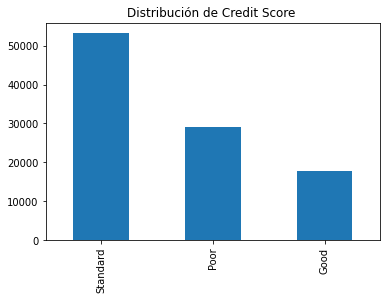

Standard    0.53174
Poor        0.28998
Good        0.17828
Name: Credit_Score, dtype: float64


In [5]:
# se realiza un grafico sobre el variable target para ver como esta distribuido. 
df_train['Credit_Score'].value_counts().plot(kind='bar')
plt.title('Distribución de Credit Score ')
plt.show()

# Se puede ver el value_counts en porcentajes:
print(df_train['Credit_Score'].value_counts(normalize=True))

Se puede observar que predomina las clases Standard, mientras que el Good es el de menos proporcion. 

In [6]:
df_train.head()

,ID,Customer_ID,Month,Name,Age,SSN,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,Num_of_Loan,Type_of_Loan,Delay_from_due_date,Num_of_Delayed_Payment,Changed_Credit_Limit,Num_Credit_Inquiries,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance,Credit_Score
0,0x1602,CUS_0xd40,January,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,1824.843333,3,4,3,4,"Auto Loan, Credit-Builder Loan, Personal Loan,...",3,7,11.27,4.0,_,809.98,26.822620,22 Years and 1 Months,No,49.574949,80.41529543900253,High_spent_Small_value_payments,312.49408867943663,Good
1,0x1603,CUS_0xd40,February,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,NaN,3,4,3,4,"Auto Loan, Credit-Builder Loan, Personal Loan,...",-1,NaN,11.27,4.0,Good,809.98,31.944960,NaN,No,49.574949,118.28022162236736,Low_spent_Large_value_payments,284.62916249607184,Good
2,0x1604,CUS_0xd40,March,Aaron Maashoh,-500,821-00-0265,Scientist,19114.12,NaN,3,4,3,4,"Auto Loan, Credit-Builder Loan, Personal Loan,...",3,7,_,4.0,Good,809.98,28.609352,22 Years and 3 Months,No,49.574949,81.699521264648,Low_spent_Medium_value_payments,331.2098628537912,Good
3,0x1605,CUS_0xd40,April,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,NaN,3,4,3,4,"Auto Loan, Credit-Builder Loan, Personal Loan,...",5,4,6.27,4.0,Good,809.98,31.377862,22 Years and 4 Months,No,49.574949,199.4580743910713,Low_spent_Small_value_payments,223.45130972736786,Good
4,0x1606,CUS_0xd40,May,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,1824.843333,3,4,3,4,"Auto Loan, Credit-Builder Loan, Personal Loan,...",6,NaN,11.27,4.0,Good,809.98,24.797347,22 Years and 5 Months,No,49.574949,41.420153086217326,High_spent_Medium_value_payments,341.48923103222177,Good


Se puede ver que hay columnas que no aporta mucha información, tales como columna ID, SSN, Name, solo aporta el dato sobre el cliente, como estas columnas aportan la misma información que la columna el Customer_ID, por lo que se procede a eliminar esas columnas. 

In [7]:
df_train = df_train.drop(['ID','Name','SSN'],axis=1)
df_train

,Customer_ID,Month,Age,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,Num_of_Loan,Type_of_Loan,Delay_from_due_date,Num_of_Delayed_Payment,Changed_Credit_Limit,Num_Credit_Inquiries,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance,Credit_Score
0,CUS_0xd40,January,23,Scientist,19114.12,1824.843333,3,4,3,4,"Auto Loan, Credit-Builder Loan, Personal Loan,...",3,7,11.27,4.0,_,809.98,26.822620,22 Years and 1 Months,No,49.574949,80.41529543900253,High_spent_Small_value_payments,312.49408867943663,Good
1,CUS_0xd40,February,23,Scientist,19114.12,NaN,3,4,3,4,"Auto Loan, Credit-Builder Loan, Personal Loan,...",-1,NaN,11.27,4.0,Good,809.98,31.944960,NaN,No,49.574949,118.28022162236736,Low_spent_Large_value_payments,284.62916249607184,Good
2,CUS_0xd40,March,-500,Scientist,19114.12,NaN,3,4,3,4,"Auto Loan, Credit-Builder Loan, Personal Loan,...",3,7,_,4.0,Good,809.98,28.609352,22 Years and 3 Months,No,49.574949,81.699521264648,Low_spent_Medium_value_payments,331.2098628537912,Good
3,CUS_0xd40,April,23,Scientist,19114.12,NaN,3,4,3,4,"Auto Loan, Credit-Builder Loan, Personal Loan,...",5,4,6.27,4.0,Good,809.98,31.377862,22 Years and 4 Months,No,49.574949,199.4580743910713,Low_spent_Small_value_payments,223.45130972736786,Good
4,CUS_0xd40,May,23,Scientist,19114.12,1824.843333,3,4,3,4,"Auto Loan, Credit-Builder Loan, Personal Loan,...",6,NaN,11.27,4.0,Good,809.98,24.797347,22 Years and 5 Months,No,49.574949,41.420153086217326,High_spent_Medium_value_payments,341.48923103222177,Good
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99995,CUS_0x942c,April,25,Mechanic,39628.99,3359.415833,4,6,7,2,"Auto Loan, and Student Loan",23,7,11.5,3.0,_,502.38,34.663572,31 Years and 6 Months,No,35.104023,60.97133255718485,High_spent_Large_value_payments,479.866228,Poor
99996,CUS_0x942c,May,25,Mechanic,39628.99,3359.415833,4,6,7,2,"Auto Loan, and Student Loan",18,7,11.5,3.0,_,502.38,40.565631,31 Years and 7 Months,No,35.104023,54.18595028760385,High_spent_Medium_value_payments,496.65161,Poor
99997,CUS_0x942c,June,25,Mechanic,39628.99,3359.415833,4,6,5729,2,"Auto Loan, and Student Loan",27,6,11.5,3.0,Good,502.38,41.255522,31 Years and 8 Months,No,35.104023,24.02847744864441,High_spent_Large_value_payments,516.809083,Poor
99998,CUS_0x942c,July,25,Mechanic,39628.99,3359.415833,4,6,7,2,"Auto Loan, and Student Loan",20,NaN,11.5,3.0,Good,502.38,33.638208,31 Years and 9 Months,No,35.104023,251.67258219721603,Low_spent_Large_value_payments,319.164979,Standard


Se puede observar que hay valores con ' _ ', por lo que para poder pasar esas columnas en numero, se debe replazar esos ' _ '. En la columna de Occupation tambien se observa valores como ' ______ ', en la columna de Payment_Behaviour se observa valores como !@9#%8, esos valores se debe sustituir por NAN, para que posteriormente se puede imputar. 

In [8]:
df_train["Occupation"].value_counts()

_______          7062
Lawyer           6575
Architect        6355
Engineer         6350
Scientist        6299
Mechanic         6291
Accountant       6271
Developer        6235
Media_Manager    6232
Teacher          6215
Entrepreneur     6174
Doctor           6087
Journalist       6085
Manager          5973
Musician         5911
Writer           5885
Name: Occupation, dtype: int64

In [9]:
df_train["Payment_Behaviour"].value_counts()

Low_spent_Small_value_payments      25513
High_spent_Medium_value_payments    17540
Low_spent_Medium_value_payments     13861
High_spent_Large_value_payments     13721
High_spent_Small_value_payments     11340
Low_spent_Large_value_payments      10425
!@9#%8                               7600
Name: Payment_Behaviour, dtype: int64

In [10]:
numeric_columns = ['Age', 'Annual_Income', 'Monthly_Inhand_Salary', 
                   'Num_Bank_Accounts', 'Num_Credit_Card', 'Interest_Rate', 'Num_of_Loan',
                   'Delay_from_due_date', 'Num_of_Delayed_Payment', 'Changed_Credit_Limit',
                   'Num_Credit_Inquiries', 'Outstanding_Debt',
                   'Credit_Utilization_Ratio', 'Total_EMI_per_month',
                   'Amount_invested_monthly', 'Monthly_Balance']
df_train[numeric_columns] = df_train[numeric_columns].replace('_', '', regex=True).replace('', np.nan).astype(float)

In [11]:
df_train['Occupation'] = df_train['Occupation'].replace('_______', '', regex=True).replace('', np.nan)
df_train['Payment_Behaviour'] = df_train['Payment_Behaviour'].str.replace('!@9#%8', '')

In [12]:
df_train.head()

,Customer_ID,Month,Age,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,Num_of_Loan,Type_of_Loan,Delay_from_due_date,Num_of_Delayed_Payment,Changed_Credit_Limit,Num_Credit_Inquiries,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance,Credit_Score
0,CUS_0xd40,January,23.0,Scientist,19114.12,1824.843333,3.0,4.0,3.0,4.0,"Auto Loan, Credit-Builder Loan, Personal Loan,...",3.0,7.0,11.27,4.0,_,809.98,26.822620,22 Years and 1 Months,No,49.574949,80.415295,High_spent_Small_value_payments,312.494089,Good
1,CUS_0xd40,February,23.0,Scientist,19114.12,NaN,3.0,4.0,3.0,4.0,"Auto Loan, Credit-Builder Loan, Personal Loan,...",-1.0,NaN,11.27,4.0,Good,809.98,31.944960,NaN,No,49.574949,118.280222,Low_spent_Large_value_payments,284.629162,Good
2,CUS_0xd40,March,-500.0,Scientist,19114.12,NaN,3.0,4.0,3.0,4.0,"Auto Loan, Credit-Builder Loan, Personal Loan,...",3.0,7.0,NaN,4.0,Good,809.98,28.609352,22 Years and 3 Months,No,49.574949,81.699521,Low_spent_Medium_value_payments,331.209863,Good
3,CUS_0xd40,April,23.0,Scientist,19114.12,NaN,3.0,4.0,3.0,4.0,"Auto Loan, Credit-Builder Loan, Personal Loan,...",5.0,4.0,6.27,4.0,Good,809.98,31.377862,22 Years and 4 Months,No,49.574949,199.458074,Low_spent_Small_value_payments,223.451310,Good
4,CUS_0xd40,May,23.0,Scientist,19114.12,1824.843333,3.0,4.0,3.0,4.0,"Auto Loan, Credit-Builder Loan, Personal Loan,...",6.0,NaN,11.27,4.0,Good,809.98,24.797347,22 Years and 5 Months,No,49.574949,41.420153,High_spent_Medium_value_payments,341.489231,Good


Se observar que en algunas columnas existe valores negativos, se analiza para ver si esos valores tiene sentido o no, en caso de que no tiene sentido hay que eliminarlos. 

In [13]:

for i in numeric_columns:
    print(i)
    print(len(df_train[df_train[i] < 0]))

Age
886
Annual_Income
0
Monthly_Inhand_Salary
0
Num_Bank_Accounts
21
Num_Credit_Card
0
Interest_Rate
0
Num_of_Loan
3876
Delay_from_due_date
591
Num_of_Delayed_Payment
644
Changed_Credit_Limit
1586
Num_Credit_Inquiries
0
Outstanding_Debt
0
Credit_Utilization_Ratio
0
Total_EMI_per_month
0
Amount_invested_monthly
0
Monthly_Balance
9


In [14]:
df_train[df_train['Monthly_Balance'] < 0]

,Customer_ID,Month,Age,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,Num_of_Loan,Type_of_Loan,Delay_from_due_date,Num_of_Delayed_Payment,Changed_Credit_Limit,Num_Credit_Inquiries,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance,Credit_Score
5545,CUS_0x9885,February,17.0,Developer,41086.400,3660.866667,3.0,4.0,6.0,7.0,"Home Equity Loan, Not Specified, Mortgage Loan...",10.0,17.0,17.86,10.0,Standard,113.98,34.826541,11 Years and 6 Months,Yes,145.544320,201.142993,Low_spent_Medium_value_payments,-3.333333e+26,Standard
26177,CUS_0x5a90,February,45.0,Engineer,29728.310,2551.359167,3.0,4.0,6.0,2.0,"Student Loan, and Student Loan",15.0,0.0,7.81,3.0,Good,917.00,38.198076,31 Years and 9 Months,No,34.496445,198.611513,Low_spent_Large_value_payments,-3.333333e+26,Good
29158,CUS_0x288d,July,55.0,Lawyer,30748.930,2572.410833,1.0,6.0,12.0,2.0,"Payday Loan, and Home Equity Loan",10.0,3.0,4.21,9.0,Good,860.97,40.634250,19 Years and 5 Months,No,43.727774,79.071807,High_spent_Small_value_payments,-3.333333e+26,Standard
35570,CUS_0x85e9,March,45.0,NaN,20929.295,1704.107917,5.0,3.0,9.0,3.0,"Student Loan, Payday Loan, and Debt Consolidat...",14.0,5.0,1.99,4.0,_,858.09,33.943626,21 Years and 7 Months,No,13798.000000,220.304552,Low_spent_Small_value_payments,-3.333333e+26,Standard
38622,CUS_0x2b77,July,21.0,Doctor,15167.620,1471.968333,4.0,5.0,3.0,1.0,Credit-Builder Loan,4.0,4.0,10.36,7.0,Good,847.03,28.541848,NaN,NM,9.930809,128.875872,Low_spent_Small_value_payments,-3.333333e+26,Standard
60009,CUS_0xc06e,February,30.0,Journalist,92114.680,7811.223333,3.0,4.0,8.0,1.0,Home Equity Loan,24.0,10.0,17.87,7.0,Standard,820.52,39.089475,20 Years and 10 Months,Yes,54.219664,NaN,High_spent_Large_value_payments,-3.333333e+26,Standard
75251,CUS_0x57f3,April,29.0,Mechanic,60904.590,NaN,3.0,4.0,12.0,2.0,"Mortgage Loan, and Home Equity Loan",22.0,14.0,18.37,8.0,Standard,2441.47,29.878716,12 Years and 11 Months,Yes,61.525140,394.893957,Low_spent_Small_value_payments,-3.333333e+26,Standard
82918,CUS_0x41bf,July,44.0,Journalist,61990.520,4900.876667,10.0,10.0,25.0,9.0,"Auto Loan, Home Equity Loan, Mortgage Loan, Au...",18.0,23.0,19.32,9.0,Bad,3618.91,37.718591,13 Years and 8 Months,NM,355.143396,194.283488,Low_spent_Small_value_payments,-3.333333e+26,Standard
83255,CUS_0x2f7e,August,31.0,Doctor,126353.040,10635.420000,4.0,7.0,19.0,2.0,"Credit-Builder Loan, and Mortgage Loan",10.0,11.0,9.43,3.0,_,859.77,28.442867,31 Years and 9 Months,No,167.043910,549.766139,Low_spent_Medium_value_payments,-3.333333e+26,Poor


Se puede observar que existe valores negativos en estas columnas, en la columna de Age hay valores de -500, en este caso no tiene sentido, ya que no puede haber edad negativos. Se elimina todos los valores fuera del rango de 1 a 119, ya que se considera que la persona con mayor edad en el mundo es de 119. 

En el Num_Bank_Accounts que representa numero de cuenta bancaria, en este caso no puede ser negativa, ya que el valor minimo de ello seria 0, no puede tener -1 cuentas bancarias, por lo que se replaza esos valores por Nan.

En el Num_of_Loanm que representa el numero de prestamos solicitados al banco, tiene valores de -100, es un valor que no tiene sentido, ya que uno no puede solicidad veces negativas. 

Delay_from_due_date, que representa el numero de dias medios de retraso, en este caso tambien debe ser un numero positivo, los que se habia retrasado en el pago de deuda, tambien puede ser 0 que no hay retrasos, pero no puede ser negativo, igualmente hay que imputar. 

Num_of_Delayed_Payment, que representa el numero medio de retraso de pago, tampoco puede ser negativo. 

Monthly_Balance: en este caso hay valor extraños como -3.333333e+26, en este caso hay que imputarlo tambien. 




In [15]:
df_train['Age'] = [i if 0< i < 120 else np.nan for i in df_train['Age'].astype(int)]
df_train['Num_Bank_Accounts'] = [i if i >= 0 else np.nan for i in df_train['Num_Bank_Accounts'].astype(int)]


In [16]:
# Se pone nan en los valores negativos de estas columnas
Columna_negativo = ["Num_of_Loan",'Delay_from_due_date','Num_of_Delayed_Payment', "Monthly_Balance", "Changed_Credit_Limit"]
for i in Columna_negativo:
    df_train[i] = df_train[i].apply(lambda x: np.nan if x<0 else x)

In [17]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 25 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   Customer_ID               100000 non-null  object 
 1   Month                     100000 non-null  object 
 2   Age                       97230 non-null   float64
 3   Occupation                92938 non-null   object 
 4   Annual_Income             100000 non-null  float64
 5   Monthly_Inhand_Salary     84998 non-null   float64
 6   Num_Bank_Accounts         99979 non-null   float64
 7   Num_Credit_Card           100000 non-null  float64
 8   Interest_Rate             100000 non-null  float64
 9   Num_of_Loan               96124 non-null   float64
 10  Type_of_Loan              88592 non-null   object 
 11  Delay_from_due_date       99409 non-null   float64
 12  Num_of_Delayed_Payment    92354 non-null   float64
 13  Changed_Credit_Limit      96323 non-null   fl

In [18]:
df_train.describe(percentiles=[0.01,0.05,0.10,0.25,0.75,0.90,0.95,0.975,0.99])

,Age,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,Num_of_Loan,Delay_from_due_date,Num_of_Delayed_Payment,Changed_Credit_Limit,Num_Credit_Inquiries,Outstanding_Debt,Credit_Utilization_Ratio,Total_EMI_per_month,Amount_invested_monthly,Monthly_Balance
count,97230.000000,1.000000e+05,84998.000000,99979.000000,100000.00000,100000.000000,96124.000000,99409.000000,92354.000000,96323.000000,98035.000000,100000.000000,100000.000000,100000.000000,95521.000000,98791.000000
mean,33.328078,1.764157e+05,4194.170850,17.095080,22.47443,72.466040,7.163622,21.207245,31.150519,10.599042,27.754251,1426.220376,32.285173,1403.118217,637.412998,402.551258
std,10.795980,1.429618e+06,3183.686167,117.416871,129.05741,466.422621,60.314923,14.794693,226.802173,6.639966,193.177339,1155.129026,5.116875,8306.041270,2043.319327,213.925499
min,14.000000,7.005930e+03,303.645417,0.000000,0.00000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.230000,20.000000,0.000000,0.000000,0.007760
1%,14.000000,7.535997e+03,531.875417,0.000000,1.00000,1.000000,0.000000,0.000000,0.000000,0.630000,0.000000,27.625600,22.740859,0.000000,16.832606,68.058849
5%,17.000000,9.743510e+03,836.125833,1.000000,3.00000,2.000000,0.000000,3.000000,2.000000,1.510000,0.000000,118.546500,24.230834,0.000000,31.893067,174.740244
10%,19.000000,1.429334e+04,1105.052500,2.000000,3.00000,4.000000,0.000000,5.000000,5.000000,2.570000,1.000000,230.737000,25.345232,0.000000,43.961177,218.438215
25%,24.000000,1.945750e+04,1625.568229,3.000000,4.00000,8.000000,2.000000,10.000000,9.000000,5.570000,3.000000,566.072500,28.052567,30.306660,74.534002,270.106630
50%,33.000000,3.757861e+04,3093.745000,6.000000,5.00000,13.000000,3.000000,18.000000,14.000000,9.520000,6.000000,1166.155000,32.305784,69.249473,135.925682,336.731225
75%,42.000000,7.279092e+04,5957.448333,7.000000,7.00000,20.000000,5.000000,28.000000,18.000000,15.010000,9.000000,1945.962500,36.496663,161.224249,265.731733,470.262938


## Outliers

Se puede observar que en muchas columnas hay outliers, en este caso, hay que inputarlos. En un primer intento se remplaza los outliers por los valores de percentil 99 0 97.5

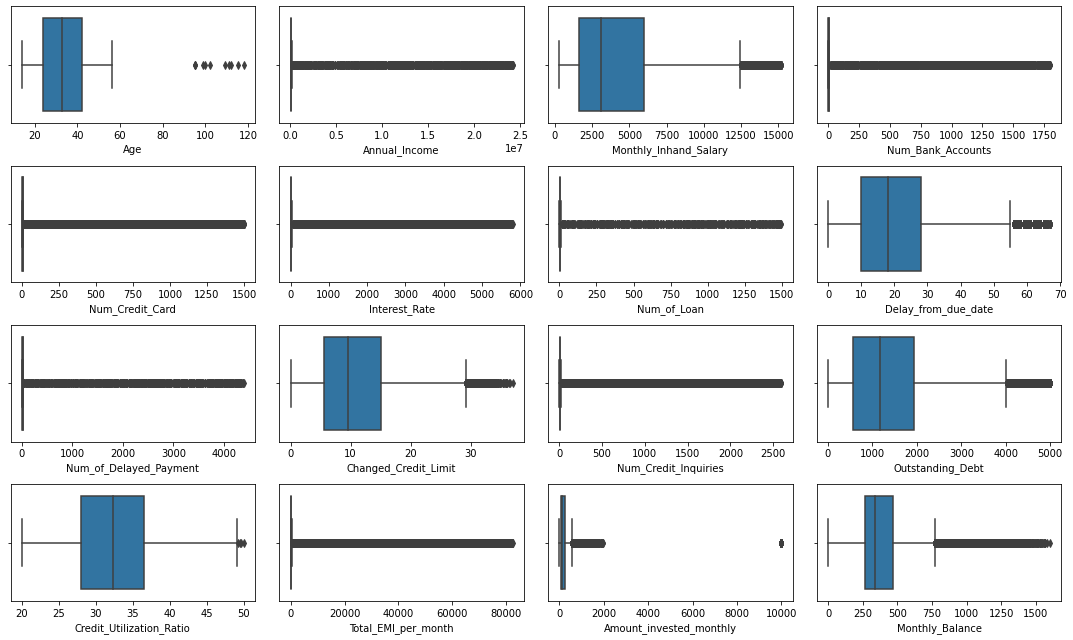

In [19]:
num_cols = df_train.select_dtypes(exclude='object').columns
fig = plt.figure(figsize= (15,9))
for i, col in enumerate(num_cols):
    
    ax=fig.add_subplot(4,4,i+1)
    
    sns.boxplot(x=df_train[col], ax=ax)
    
fig.tight_layout()  
plt.show()

In [20]:
columnas_con_outliers_99 = ['Age',
 'Annual_Income',
 'Num_of_Loan',
 'Num_of_Delayed_Payment',
 'Total_EMI_per_month',
 'Monthly_Inhand_Salary',
 'Monthly_Balance']

columnas_con_outliers_97 = [
 'Num_Bank_Accounts',
 'Num_Credit_Card',
 'Interest_Rate',
 'Num_Credit_Inquiries',
 'Outstanding_Debt',
 'Amount_invested_monthly']

In [21]:
for x in list(columnas_con_outliers_99):
    upper = df_train[x].quantile(0.99)
    df_train[x] = np.where(df_train[x] > upper,
    upper,df_train[x])

In [22]:
for x in list(columnas_con_outliers_97):
    upper = df_train[x].quantile(0.975)
    df_train[x] = np.where(df_train[x] > upper,
    upper,df_train[x])

In [23]:
# para la columna Amount_invested_monthly, se puede usa el percentil 95
upper = df_train['Amount_invested_monthly'].quantile(0.95)
df_train['Amount_invested_monthly'] = np.where(df_train['Amount_invested_monthly'] > upper,upper,df_train['Amount_invested_monthly'])

In [24]:
# para la columna Total_EMI_per_month, se puede usa el percentil 95
upper = df_train['Total_EMI_per_month'].quantile(0.95)
df_train['Total_EMI_per_month'] = np.where(df_train['Total_EMI_per_month'] > upper,upper,df_train['Total_EMI_per_month'])

In [25]:
df_train.describe()

,Age,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,Num_of_Loan,Delay_from_due_date,Num_of_Delayed_Payment,Changed_Credit_Limit,Num_Credit_Inquiries,Outstanding_Debt,Credit_Utilization_Ratio,Total_EMI_per_month,Amount_invested_monthly,Monthly_Balance
count,97230.000000,100000.000000,84998.000000,99979.000000,100000.000000,100000.000000,96124.000000,99409.000000,92354.000000,96323.000000,98035.000000,100000.000000,100000.000000,100000.000000,95521.000000,98791.000000
mean,33.318739,51791.178195,4187.762996,5.429800,5.634400,14.927590,3.560599,21.207245,13.526442,10.599042,5.925833,1420.570474,32.285173,112.626724,237.614338,401.366152
std,10.763748,40222.082837,3163.409364,2.628661,2.148861,9.076456,2.471013,14.794693,6.296236,6.639966,3.981819,1139.020564,5.116875,116.328359,274.239386,209.250577
min,14.000000,7005.930000,303.645417,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.230000,20.000000,0.000000,0.000000,0.007760
25%,24.000000,19457.500000,1625.568229,3.000000,4.000000,8.000000,2.000000,10.000000,9.000000,5.570000,3.000000,566.072500,28.052567,30.306660,74.534002,270.106630
50%,33.000000,37578.610000,3093.745000,6.000000,5.000000,13.000000,3.000000,18.000000,14.000000,9.520000,6.000000,1166.155000,32.305784,69.249473,135.925682,336.731225
75%,42.000000,72790.920000,5957.448333,7.000000,7.000000,20.000000,5.000000,28.000000,18.000000,15.010000,9.000000,1945.962500,36.496663,161.224249,265.731733,470.262938
max,55.000000,179987.280000,13814.930000,10.000000,10.000000,34.000000,9.000000,67.000000,27.000000,36.970000,15.000000,4543.220000,50.000000,437.012753,1149.405785,1139.057493


## Missing Values

Despues de eliminar ' _ ', tambien vemos que existe missing values en muchas columnas, eliminar los valores negativas en algunas columnas se debe imputar los valores de NAN

In [26]:
df_train.isnull().sum().sort_values()

Customer_ID                     0
Payment_Behaviour               0
Total_EMI_per_month             0
Payment_of_Min_Amount           0
Credit_Utilization_Ratio        0
Outstanding_Debt                0
Credit_Mix                      0
Interest_Rate                   0
Credit_Score                    0
Annual_Income                   0
Month                           0
Num_Credit_Card                 0
Num_Bank_Accounts              21
Delay_from_due_date           591
Monthly_Balance              1209
Num_Credit_Inquiries         1965
Age                          2770
Changed_Credit_Limit         3677
Num_of_Loan                  3876
Amount_invested_monthly      4479
Occupation                   7062
Num_of_Delayed_Payment       7646
Credit_History_Age           9030
Type_of_Loan                11408
Monthly_Inhand_Salary       15002
dtype: int64

In [27]:

for column in ['Num_Bank_Accounts','Delay_from_due_date','Monthly_Balance','Num_Credit_Inquiries','Changed_Credit_Limit',
            'Age','Num_of_Loan','Amount_invested_monthly','Occupation','Num_of_Delayed_Payment','Credit_History_Age',
            'Type_of_Loan','Monthly_Inhand_Salary']:
    
    df_train[column] = df_train.groupby('Customer_ID')[column].transform(lambda x: x.fillna(x.mode()[0])if not x.mode().empty else np.nan)

In [28]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 25 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   Customer_ID               100000 non-null  object 
 1   Month                     100000 non-null  object 
 2   Age                       100000 non-null  float64
 3   Occupation                100000 non-null  object 
 4   Annual_Income             100000 non-null  float64
 5   Monthly_Inhand_Salary     100000 non-null  float64
 6   Num_Bank_Accounts         100000 non-null  float64
 7   Num_Credit_Card           100000 non-null  float64
 8   Interest_Rate             100000 non-null  float64
 9   Num_of_Loan               100000 non-null  float64
 10  Type_of_Loan              88592 non-null   object 
 11  Delay_from_due_date       100000 non-null  float64
 12  Num_of_Delayed_Payment    100000 non-null  float64
 13  Changed_Credit_Limit      100000 non-null  fl

## EDA

<AxesSubplot:xlabel='Occupation', ylabel='count'>

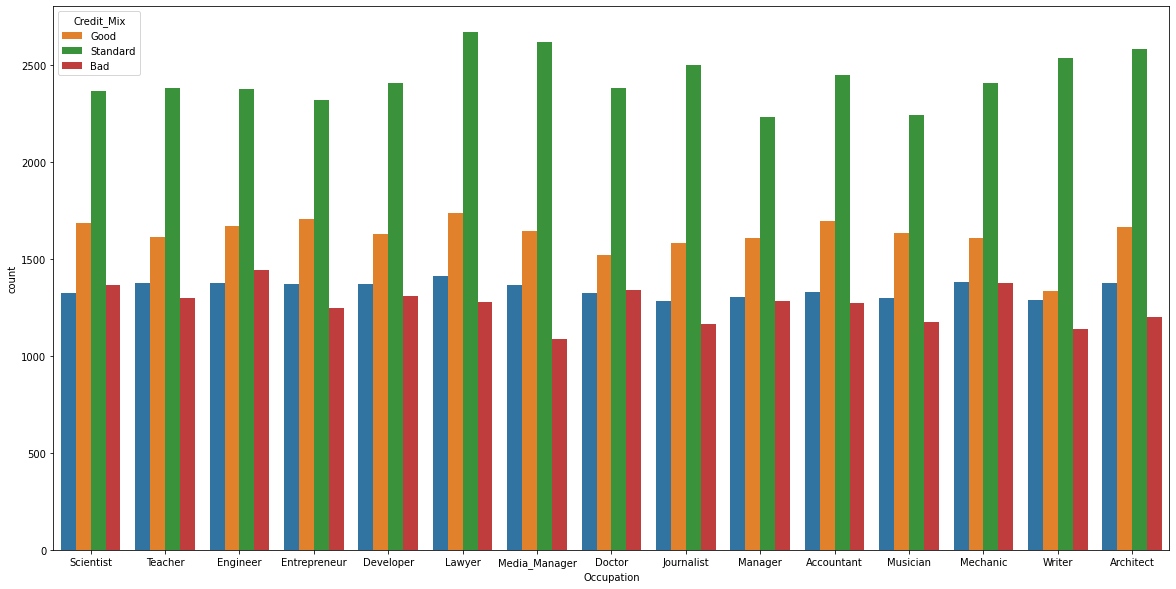

In [29]:
fig = plt.figure(figsize= (20,10))
sns.countplot(data=df_train,x="Occupation",hue="Credit_Mix")

<Figure size 1296x432 with 0 Axes>

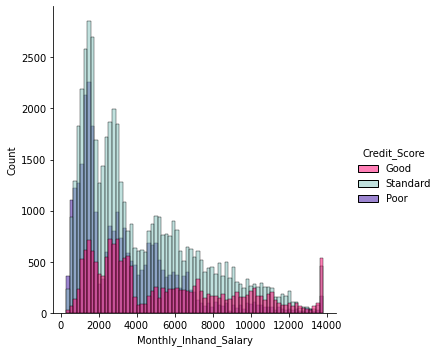

<Figure size 1296x432 with 0 Axes>

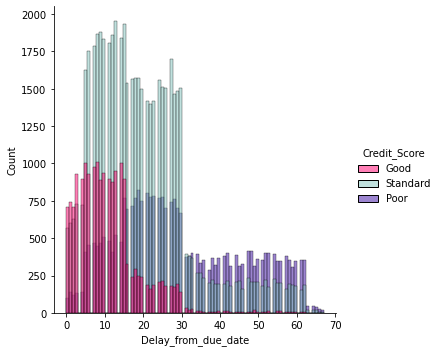

<Figure size 1296x432 with 0 Axes>

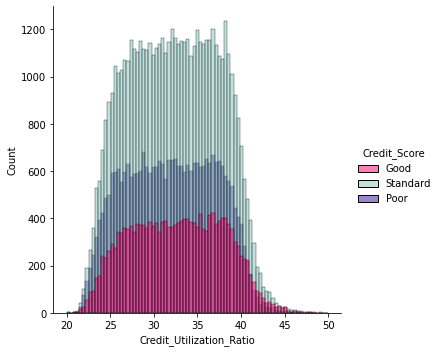

<Figure size 1296x432 with 0 Axes>

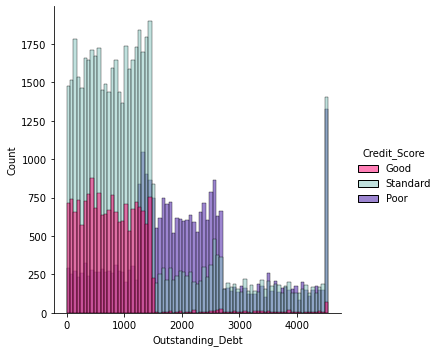

In [30]:
numCols = ['Monthly_Inhand_Salary', 'Delay_from_due_date', 'Credit_Utilization_Ratio','Outstanding_Debt']

for col in numCols:
    plt.figure(figsize=(18,6))
    sns.displot(x=col,data=df_train, hue='Credit_Score', palette=["#ff006e", "#83c5be", "#3a0ca3"])
    plt.show()

<Figure size 1296x432 with 0 Axes>

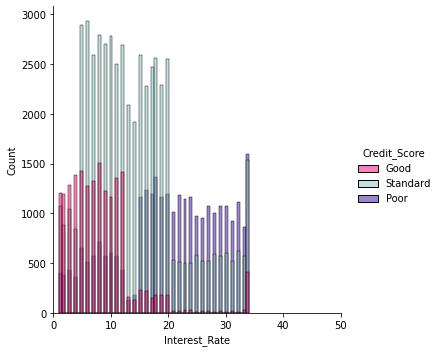

In [31]:
plt.figure(figsize=(18,6))
sns.displot(x='Interest_Rate',data=df_train, hue='Credit_Score', palette=["#ff006e", "#83c5be", "#3a0ca3"])
plt.xlim(0,50)
plt.show()

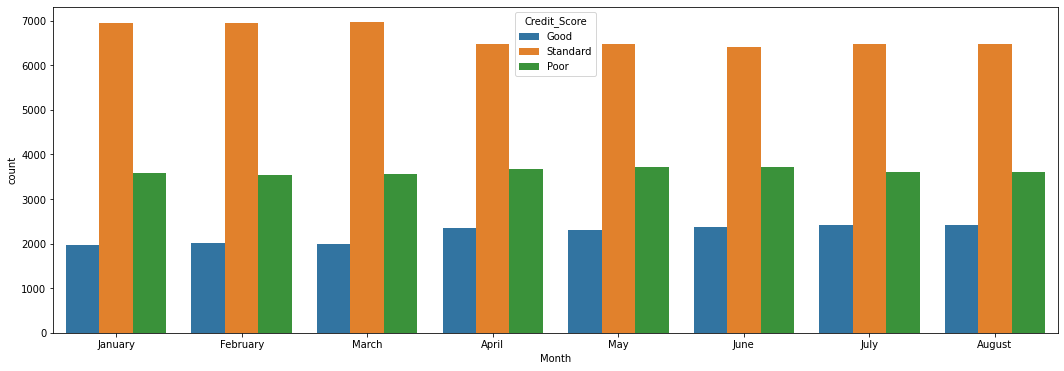

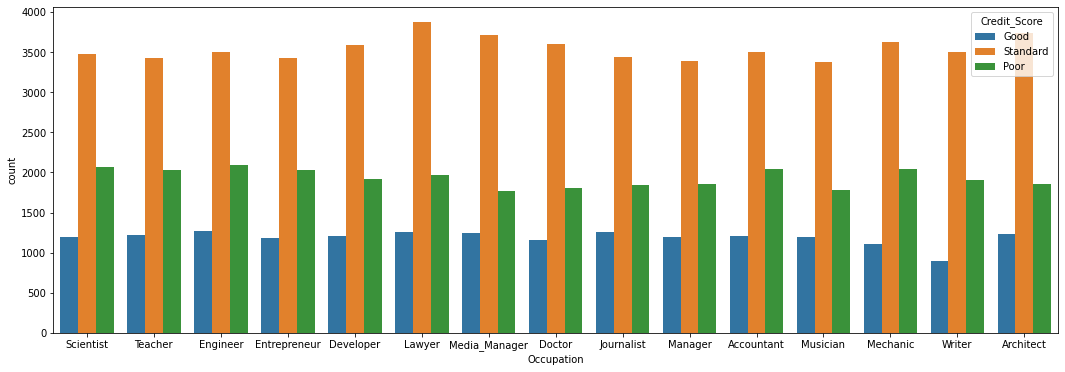

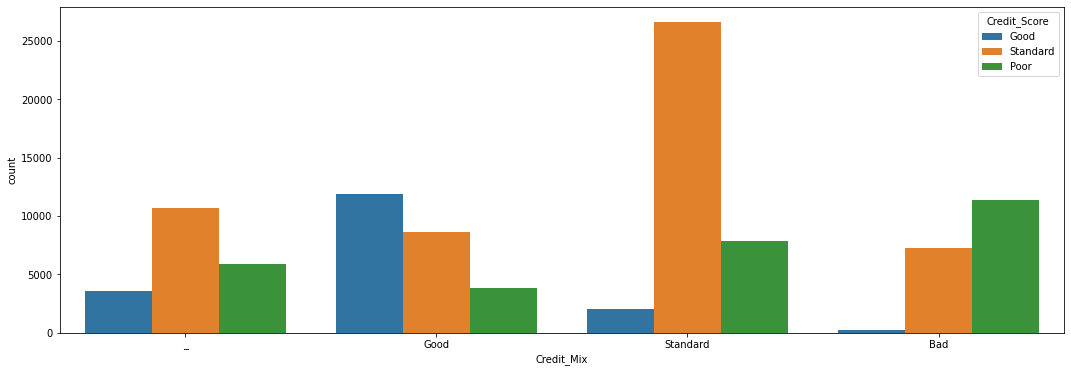

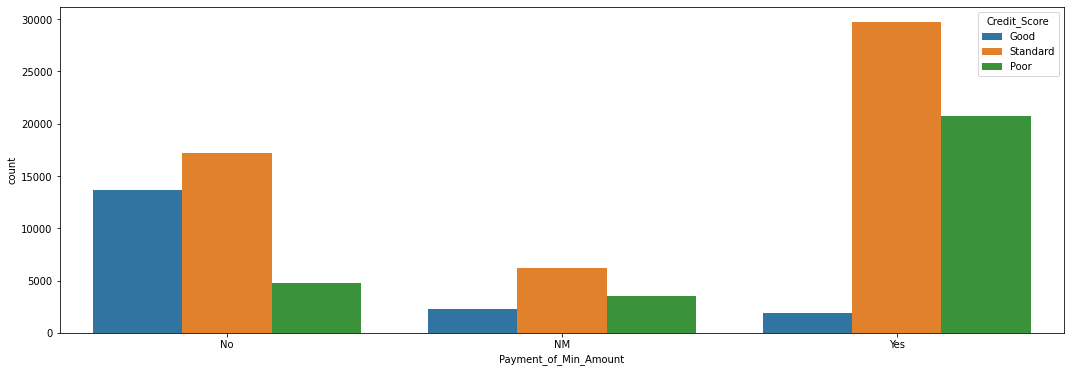

In [32]:
objCols = ['Month', 'Occupation', 'Credit_Mix', 'Payment_of_Min_Amount']

for col in objCols:
    plt.figure(figsize=(18,6))
    sns.countplot(x=col,data=df_train, hue="Credit_Score")
    plt.show()

<AxesSubplot:xlabel='count', ylabel='Payment_Behaviour'>

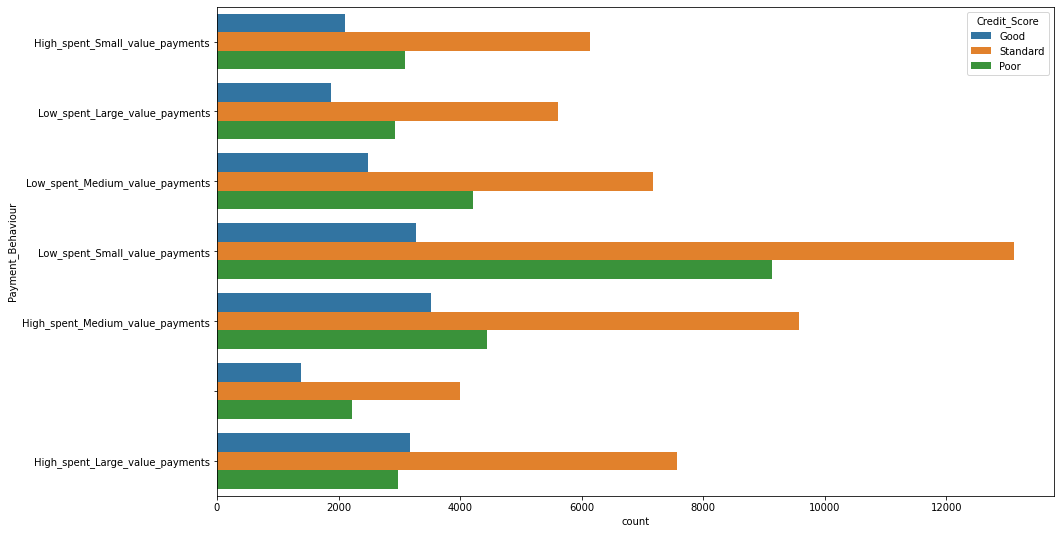

In [33]:
fig = plt.figure(figsize= (15,9))
sns.countplot(data=df_train,y="Payment_Behaviour", hue="Credit_Score")

## Feature engineering



En este apartado se trata de obtener información de los variables categoricos. 

En el caso de Occupation, probamos en sustituir una occupacion por un numero, a ver si se puede obtener alguna información. 

In [34]:
df_train["Occupation"].value_counts()

Lawyer           7096
Engineer         6864
Architect        6824
Mechanic         6776
Scientist        6744
Accountant       6744
Developer        6720
Media_Manager    6720
Teacher          6672
Entrepreneur     6648
Doctor           6568
Journalist       6536
Manager          6432
Musician         6352
Writer           6304
Name: Occupation, dtype: int64

In [35]:
le = LabelEncoder()

le.fit(df_train['Occupation'])
df_train['Occupation'] = le.transform(df_train['Occupation'])


Pero por los graficos obtenidos por la eda, se puede ver que aun hay dados que no estan correctos, por lo que se procede al tratamiento de los datos. Y porsteriormente se genera un numero para cada una de las clases de las columnas, para que posteriormente se puede analizar. 

In [36]:
df_train["Credit_Mix"].value_counts()

Standard    36479
Good        24337
_           20195
Bad         18989
Name: Credit_Mix, dtype: int64

In [37]:
df_train["Credit_Mix"]=df_train["Credit_Mix"].replace('_', '', regex=True).replace('', np.nan)

In [38]:
df_train["Credit_Mix"] = df_train.groupby('Customer_ID')["Credit_Mix"].transform(lambda x: x.fillna(x.mode()[0])if not x.mode().empty else np.nan)

In [39]:
my_dict = {'Bad':0,
           'Standard':1,
           'Good':2}
df_train["Credit_Mix"] = df_train["Credit_Mix"].map(my_dict)
df_train.head()

,Customer_ID,Month,Age,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,Num_of_Loan,Type_of_Loan,Delay_from_due_date,Num_of_Delayed_Payment,Changed_Credit_Limit,Num_Credit_Inquiries,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance,Credit_Score
0,CUS_0xd40,January,23.0,12,19114.12,1824.843333,3.0,4.0,3.0,4.0,"Auto Loan, Credit-Builder Loan, Personal Loan,...",3.0,7.0,11.27,4.0,2,809.98,26.822620,22 Years and 1 Months,No,49.574949,80.415295,High_spent_Small_value_payments,312.494089,Good
1,CUS_0xd40,February,23.0,12,19114.12,1824.843333,3.0,4.0,3.0,4.0,"Auto Loan, Credit-Builder Loan, Personal Loan,...",3.0,4.0,11.27,4.0,2,809.98,31.944960,22 Years and 1 Months,No,49.574949,118.280222,Low_spent_Large_value_payments,284.629162,Good
2,CUS_0xd40,March,23.0,12,19114.12,1824.843333,3.0,4.0,3.0,4.0,"Auto Loan, Credit-Builder Loan, Personal Loan,...",3.0,7.0,11.27,4.0,2,809.98,28.609352,22 Years and 3 Months,No,49.574949,81.699521,Low_spent_Medium_value_payments,331.209863,Good
3,CUS_0xd40,April,23.0,12,19114.12,1824.843333,3.0,4.0,3.0,4.0,"Auto Loan, Credit-Builder Loan, Personal Loan,...",5.0,4.0,6.27,4.0,2,809.98,31.377862,22 Years and 4 Months,No,49.574949,199.458074,Low_spent_Small_value_payments,223.451310,Good
4,CUS_0xd40,May,23.0,12,19114.12,1824.843333,3.0,4.0,3.0,4.0,"Auto Loan, Credit-Builder Loan, Personal Loan,...",6.0,4.0,11.27,4.0,2,809.98,24.797347,22 Years and 5 Months,No,49.574949,41.420153,High_spent_Medium_value_payments,341.489231,Good


In [40]:
df_train['Credit_History_Age'].unique()

array(['22 Years and 1 Months', '22 Years and 3 Months',
       '22 Years and 4 Months', '22 Years and 5 Months',
       '22 Years and 6 Months', '22 Years and 7 Months',
       '26 Years and 7 Months', '26 Years and 8 Months',
       '26 Years and 9 Months', '26 Years and 10 Months',
       '26 Years and 11 Months', '27 Years and 0 Months',
       '27 Years and 1 Months', '27 Years and 2 Months',
       '17 Years and 9 Months', '17 Years and 10 Months',
       '17 Years and 11 Months', '18 Years and 1 Months',
       '18 Years and 2 Months', '18 Years and 3 Months',
       '18 Years and 4 Months', '17 Years and 3 Months',
       '17 Years and 4 Months', '17 Years and 5 Months',
       '17 Years and 6 Months', '17 Years and 7 Months',
       '17 Years and 8 Months', '30 Years and 8 Months',
       '30 Years and 9 Months', '30 Years and 10 Months',
       '30 Years and 11 Months', '31 Years and 0 Months',
       '31 Years and 1 Months', '31 Years and 2 Months',
       '31 Years and 3 Mo

Se puede ver que 'Credit_History_Age' esta tanto en años como en meces, se pasa todo en meses para ver si se puede sacar alguna información adicional.

In [41]:
# Sacar los datos que de años
year = df_train['Credit_History_Age'].str.findall(r'\d+').apply(lambda x: int(x[0]) if type(x) !=float else np.nan)
# Sacar tados en mes
month = df_train['Credit_History_Age'].str.findall(r'\d+').apply(lambda x: int(x[1]) if type(x) !=float else np.nan)

# Convertir todos los datos en meses
df_train['Credit_History_Age_en_mes'] = 12 * year + month

In [42]:
df_train["Payment_of_Min_Amount"].value_counts()

Yes    52326
No     35667
NM     12007
Name: Payment_of_Min_Amount, dtype: int64

En este caso Payment_of_Min_Amount representa si la persona solo ha pagado o no el importe minimo, solo puede haber dos respuesta, yes o no, por lo que NM se considera tambien como NAN, por lo que hay que imputarlos, y despues pasar todos los yes a 1 y no a 0.

In [43]:
df_train["Payment_of_Min_Amount"]=df_train["Payment_of_Min_Amount"].replace('NM', np.nan)


In [44]:
df_train["Payment_of_Min_Amount"] = df_train.groupby('Customer_ID')["Payment_of_Min_Amount"].transform(lambda x: x.fillna(x.mode()[0])if not x.mode().empty else np.nan)

In [45]:
df_train["Payment_of_Min_Amount"]= np.where(df_train['Payment_of_Min_Amount'] == "Yes",1,0)

In [46]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 26 columns):
 #   Column                     Non-Null Count   Dtype  
---  ------                     --------------   -----  
 0   Customer_ID                100000 non-null  object 
 1   Month                      100000 non-null  object 
 2   Age                        100000 non-null  float64
 3   Occupation                 100000 non-null  int64  
 4   Annual_Income              100000 non-null  float64
 5   Monthly_Inhand_Salary      100000 non-null  float64
 6   Num_Bank_Accounts          100000 non-null  float64
 7   Num_Credit_Card            100000 non-null  float64
 8   Interest_Rate              100000 non-null  float64
 9   Num_of_Loan                100000 non-null  float64
 10  Type_of_Loan               88592 non-null   object 
 11  Delay_from_due_date        100000 non-null  float64
 12  Num_of_Delayed_Payment     100000 non-null  float64
 13  Changed_Credit_Limit       100

In [47]:
df_train["Payment_Behaviour"].value_counts()

Low_spent_Small_value_payments      25513
High_spent_Medium_value_payments    17540
Low_spent_Medium_value_payments     13861
High_spent_Large_value_payments     13721
High_spent_Small_value_payments     11340
Low_spent_Large_value_payments      10425
                                     7600
Name: Payment_Behaviour, dtype: int64

In [48]:
df_train["Payment_Behaviour"]=df_train["Payment_Behaviour"].replace('', np.nan)

In [49]:
df_train["Payment_Behaviour"].value_counts()

Low_spent_Small_value_payments      25513
High_spent_Medium_value_payments    17540
Low_spent_Medium_value_payments     13861
High_spent_Large_value_payments     13721
High_spent_Small_value_payments     11340
Low_spent_Large_value_payments      10425
Name: Payment_Behaviour, dtype: int64

In [50]:
df_train[df_train["Payment_Behaviour"].isna()]

,Customer_ID,Month,Age,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,Num_of_Loan,Type_of_Loan,Delay_from_due_date,Num_of_Delayed_Payment,Changed_Credit_Limit,Num_Credit_Inquiries,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance,Credit_Score,Credit_History_Age_en_mes
5,CUS_0xd40,June,23.0,12,19114.12,1824.843333,3.0,4.0,3.0,4.0,"Auto Loan, Credit-Builder Loan, Personal Loan,...",8.0,4.0,9.27,4.0,2,809.98,27.262259,22 Years and 6 Months,0,49.574949,62.430172,NaN,340.479212,Good,270
16,CUS_0x2dbc,January,34.0,4,143162.64,12187.220000,1.0,5.0,8.0,3.0,"Auto Loan, Auto Loan, and Not Specified",5.0,8.0,7.10,3.0,2,1303.01,28.616735,17 Years and 9 Months,0,246.992319,168.413703,NaN,1043.315978,Good,213
32,CUS_0x1cdb,January,21.0,2,35547.71,2853.309167,7.0,5.0,5.0,0.0,NaN,5.0,15.0,2.58,4.0,1,943.86,39.797764,30 Years and 8 Months,1,0.000000,276.725394,NaN,288.605522,Standard,368
47,CUS_0x95ee,August,31.0,7,73928.46,5988.705000,4.0,5.0,8.0,0.0,NaN,8.0,7.0,10.14,2.0,2,548.20,31.580990,32 Years and 6 Months,0,0.000000,42.635590,NaN,796.234910,Good,390
54,CUS_0x284a,July,34.0,7,179987.28,10469.207759,0.0,1.0,8.0,2.0,"Credit-Builder Loan, and Mortgage Loan",0.0,2.0,9.34,4.0,2,352.16,26.947565,31 Years and 1 Months,0,437.012753,930.391898,NaN,326.241830,Good,373
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99947,CUS_0x51b3,April,33.0,10,59146.36,4908.863333,2.0,5.0,6.0,1.0,Personal Loan,8.0,6.0,6.68,5.0,2,418.03,28.091458,20 Years and 4 Months,0,26.778419,183.584149,NaN,530.523765,Standard,244
99980,CUS_0xaf61,May,49.0,14,37188.10,3097.008333,1.0,4.0,5.0,3.0,"Home Equity Loan, Mortgage Loan, and Student Loan",7.0,12.0,5.38,3.0,2,620.64,27.495263,30 Years and 1 Months,0,84.205949,78.497727,NaN,396.997157,Standard,361
99982,CUS_0xaf61,July,50.0,14,37188.10,3097.008333,1.0,4.0,5.0,3.0,"Home Equity Loan, Mortgage Loan, and Student Loan",7.0,13.0,5.38,3.0,2,620.64,38.850680,30 Years and 3 Months,0,84.205949,82.825572,NaN,412.669312,Good,363
99989,CUS_0x8600,June,28.0,1,20002.88,1929.906667,10.0,8.0,29.0,5.0,"Personal Loan, Auto Loan, Mortgage Loan, Stude...",33.0,25.0,16.31,9.0,0,3571.70,33.359987,6 Years and 1 Months,1,60.964772,74.366603,NaN,307.659291,Standard,73


In [51]:
df_train["Payment_Behaviour"] = df_train.groupby('Customer_ID')["Payment_Behaviour"].transform(lambda x: x.fillna(x.mode()[0])if not x.mode().empty else np.nan)

In [52]:
df_train.head(10)

,Customer_ID,Month,Age,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,Num_of_Loan,Type_of_Loan,Delay_from_due_date,Num_of_Delayed_Payment,Changed_Credit_Limit,Num_Credit_Inquiries,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance,Credit_Score,Credit_History_Age_en_mes
0,CUS_0xd40,January,23.0,12,19114.12,1824.843333,3.0,4.0,3.0,4.0,"Auto Loan, Credit-Builder Loan, Personal Loan,...",3.0,7.0,11.27,4.0,2,809.98,26.822620,22 Years and 1 Months,0,49.574949,80.415295,High_spent_Small_value_payments,312.494089,Good,265
1,CUS_0xd40,February,23.0,12,19114.12,1824.843333,3.0,4.0,3.0,4.0,"Auto Loan, Credit-Builder Loan, Personal Loan,...",3.0,4.0,11.27,4.0,2,809.98,31.944960,22 Years and 1 Months,0,49.574949,118.280222,Low_spent_Large_value_payments,284.629162,Good,265
2,CUS_0xd40,March,23.0,12,19114.12,1824.843333,3.0,4.0,3.0,4.0,"Auto Loan, Credit-Builder Loan, Personal Loan,...",3.0,7.0,11.27,4.0,2,809.98,28.609352,22 Years and 3 Months,0,49.574949,81.699521,Low_spent_Medium_value_payments,331.209863,Good,267
3,CUS_0xd40,April,23.0,12,19114.12,1824.843333,3.0,4.0,3.0,4.0,"Auto Loan, Credit-Builder Loan, Personal Loan,...",5.0,4.0,6.27,4.0,2,809.98,31.377862,22 Years and 4 Months,0,49.574949,199.458074,Low_spent_Small_value_payments,223.451310,Good,268
4,CUS_0xd40,May,23.0,12,19114.12,1824.843333,3.0,4.0,3.0,4.0,"Auto Loan, Credit-Builder Loan, Personal Loan,...",6.0,4.0,11.27,4.0,2,809.98,24.797347,22 Years and 5 Months,0,49.574949,41.420153,High_spent_Medium_value_payments,341.489231,Good,269
5,CUS_0xd40,June,23.0,12,19114.12,1824.843333,3.0,4.0,3.0,4.0,"Auto Loan, Credit-Builder Loan, Personal Loan,...",8.0,4.0,9.27,4.0,2,809.98,27.262259,22 Years and 6 Months,0,49.574949,62.430172,High_spent_Medium_value_payments,340.479212,Good,270
6,CUS_0xd40,July,23.0,12,19114.12,1824.843333,3.0,4.0,3.0,4.0,"Auto Loan, Credit-Builder Loan, Personal Loan,...",3.0,8.0,11.27,4.0,2,809.98,22.537593,22 Years and 7 Months,0,49.574949,178.344067,Low_spent_Small_value_payments,244.565317,Good,271
7,CUS_0xd40,August,23.0,12,19114.12,1824.843333,3.0,4.0,3.0,4.0,"Auto Loan, Credit-Builder Loan, Personal Loan,...",3.0,6.0,11.27,4.0,2,809.98,23.933795,22 Years and 1 Months,0,49.574949,24.785217,High_spent_Medium_value_payments,358.124168,Standard,265
8,CUS_0x21b1,January,28.0,13,34847.84,3037.986667,2.0,4.0,6.0,1.0,Credit-Builder Loan,3.0,4.0,5.42,2.0,2,605.03,24.464031,26 Years and 7 Months,0,18.816215,104.291825,Low_spent_Small_value_payments,470.690627,Standard,319
9,CUS_0x21b1,February,28.0,13,34847.84,3037.986667,2.0,4.0,6.0,1.0,Credit-Builder Loan,7.0,1.0,7.42,2.0,2,605.03,38.550848,26 Years and 8 Months,0,18.816215,40.391238,High_spent_Large_value_payments,484.591214,Good,320


In [53]:
my_dict1 = {'Low_spent_Small_value_payments':0,
           'Low_spent_Medium_value_payments':1,
           'Low_spent_Large_value_payments':2,
           'High_spent_Small_value_payments':3,
           'High_spent_Medium_value_payments':4,
           'High_spent_Large_value_payments':5}
df_train["Payment_Behaviour"] = df_train["Payment_Behaviour"].map(my_dict1)
df_train.head()

,Customer_ID,Month,Age,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,Num_of_Loan,Type_of_Loan,Delay_from_due_date,Num_of_Delayed_Payment,Changed_Credit_Limit,Num_Credit_Inquiries,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance,Credit_Score,Credit_History_Age_en_mes
0,CUS_0xd40,January,23.0,12,19114.12,1824.843333,3.0,4.0,3.0,4.0,"Auto Loan, Credit-Builder Loan, Personal Loan,...",3.0,7.0,11.27,4.0,2,809.98,26.822620,22 Years and 1 Months,0,49.574949,80.415295,3,312.494089,Good,265
1,CUS_0xd40,February,23.0,12,19114.12,1824.843333,3.0,4.0,3.0,4.0,"Auto Loan, Credit-Builder Loan, Personal Loan,...",3.0,4.0,11.27,4.0,2,809.98,31.944960,22 Years and 1 Months,0,49.574949,118.280222,2,284.629162,Good,265
2,CUS_0xd40,March,23.0,12,19114.12,1824.843333,3.0,4.0,3.0,4.0,"Auto Loan, Credit-Builder Loan, Personal Loan,...",3.0,7.0,11.27,4.0,2,809.98,28.609352,22 Years and 3 Months,0,49.574949,81.699521,1,331.209863,Good,267
3,CUS_0xd40,April,23.0,12,19114.12,1824.843333,3.0,4.0,3.0,4.0,"Auto Loan, Credit-Builder Loan, Personal Loan,...",5.0,4.0,6.27,4.0,2,809.98,31.377862,22 Years and 4 Months,0,49.574949,199.458074,0,223.451310,Good,268
4,CUS_0xd40,May,23.0,12,19114.12,1824.843333,3.0,4.0,3.0,4.0,"Auto Loan, Credit-Builder Loan, Personal Loan,...",6.0,4.0,11.27,4.0,2,809.98,24.797347,22 Years and 5 Months,0,49.574949,41.420153,4,341.489231,Good,269


Por lo ultimo pasar el valor target tambien en numero. 

In [54]:
df_train["Credit_Score"].value_counts()

Standard    53174
Poor        28998
Good        17828
Name: Credit_Score, dtype: int64

In [55]:
my_dict2 = {'Poor':0,
           'Standard':1,
           'Good':2}
df_train["Credit_Score"] = df_train["Credit_Score"].map(my_dict2)


<AxesSubplot:>

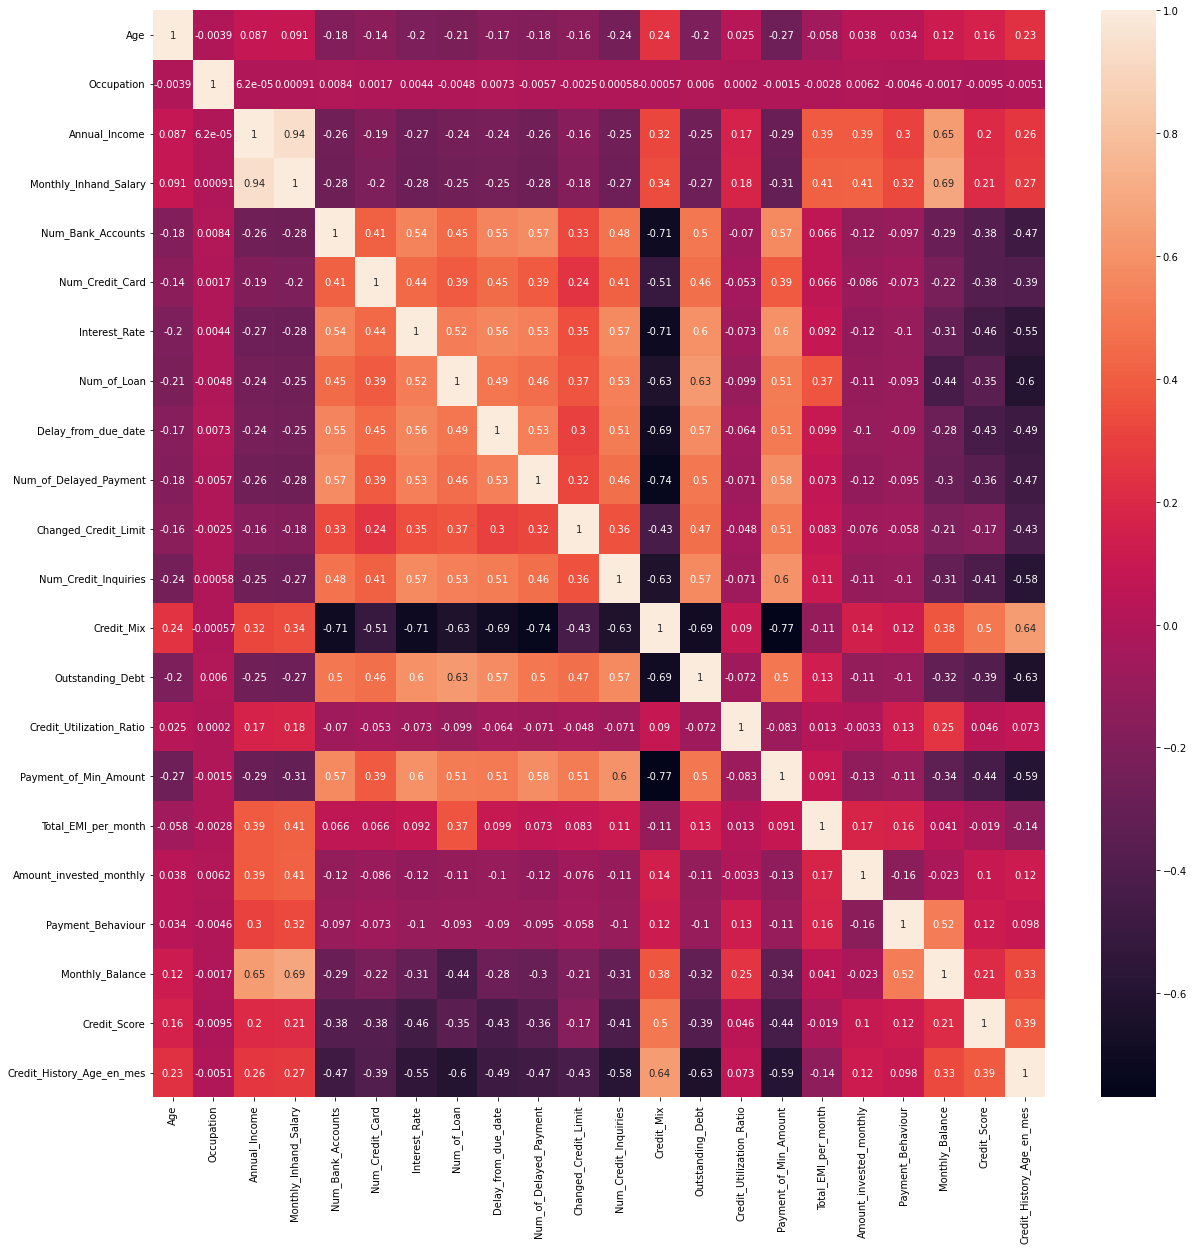

In [56]:
plt.figure(figsize= (20,20))
sns.heatmap(df_train.corr(), annot=True)

Se genera una matriz de correlaciones para ver si hay relacion entre los feacture y el variable target. Despues de observar en la matriz, vemos que muchas variables tiene correlacion con la variable target tanto positivamente como negativamente, se selecciona los variables con una correlacion mayor de un 0.1 en valores absolutos. Tambien vemos que Annual_Income	y Monthly_Inhand_Salary tiene una correlacion fuerte, para evitar multicolinealidad, se procede a eliminar una de ella. 

## Modelo de clasificacion

## Logistic Regression

In [57]:
X = df_train[['Age',
       'Monthly_Inhand_Salary', 'Num_Bank_Accounts', 'Num_Credit_Card',
       'Interest_Rate', 'Num_of_Loan', 'Delay_from_due_date',
       'Num_of_Delayed_Payment', 'Changed_Credit_Limit',
       'Num_Credit_Inquiries', 'Credit_Mix', 'Outstanding_Debt',
       'Payment_of_Min_Amount',
       'Credit_History_Age_en_mes']]
y = df_train['Credit_Score']

In [58]:
X

,Age,Monthly_Inhand_Salary,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,Num_of_Loan,Delay_from_due_date,Num_of_Delayed_Payment,Changed_Credit_Limit,Num_Credit_Inquiries,Credit_Mix,Outstanding_Debt,Payment_of_Min_Amount,Credit_History_Age_en_mes
0,23.0,1824.843333,3.0,4.0,3.0,4.0,3.0,7.0,11.27,4.0,2,809.98,0,265
1,23.0,1824.843333,3.0,4.0,3.0,4.0,3.0,4.0,11.27,4.0,2,809.98,0,265
2,23.0,1824.843333,3.0,4.0,3.0,4.0,3.0,7.0,11.27,4.0,2,809.98,0,267
3,23.0,1824.843333,3.0,4.0,3.0,4.0,5.0,4.0,6.27,4.0,2,809.98,0,268
4,23.0,1824.843333,3.0,4.0,3.0,4.0,6.0,4.0,11.27,4.0,2,809.98,0,269
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99995,25.0,3359.415833,4.0,6.0,7.0,2.0,23.0,7.0,11.50,3.0,2,502.38,0,378
99996,25.0,3359.415833,4.0,6.0,7.0,2.0,18.0,7.0,11.50,3.0,2,502.38,0,379
99997,25.0,3359.415833,4.0,6.0,34.0,2.0,27.0,6.0,11.50,3.0,2,502.38,0,380
99998,25.0,3359.415833,4.0,6.0,7.0,2.0,20.0,6.0,11.50,3.0,2,502.38,0,381


Antes de realizar el modelo se puede ver que la escala de los valores de las columna son muy diferentes por lo que se debe normalizar los valores para obtener un mejor resultado. 

In [74]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state=42)

print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(80000, 14)
(20000, 14)
(80000,)
(20000,)


In [103]:
X_train["Credit_Score"]=y_train
X_test["Credit_Score"]=y_test

X_train.to_csv("train.csv")
X_test.to_csv("test.csv")





In [75]:

# Almaceno en el objeto scaler todo lo necesario para estandarizar, con los datos de train
scaler = StandardScaler()
scaler.fit(X_train)

# Utilizo los datos de train para escalar train y test.
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [76]:
from sklearn.linear_model import LogisticRegression

log_reg_1 = LogisticRegression()
log_reg_1.fit(X_train_scaled, y_train)
y_pred = log_reg_1.predict(X_test_scaled)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.67      0.52      0.58      5874
           1       0.69      0.73      0.71     10599
           2       0.54      0.65      0.59      3527

    accuracy                           0.65     20000
   macro avg       0.63      0.63      0.63     20000
weighted avg       0.66      0.65      0.65     20000



## Decision Tree


In [77]:
# Primero se prueba un Decidion Tree basico para ver el resultado, depues se aplica un GridSearchCV

dt_basico = DecisionTreeClassifier(random_state=7)
dt_basico.fit(X_train_scaled, y_train)


dt_basico_pred = dt_basico.predict(X_test_scaled)

print(classification_report(y_test, dt_basico_pred))

# Se puede ver que por accuracy, el modelo de decision Tree ya es mejor que el de regresion logistica. 

              precision    recall  f1-score   support

           0       0.76      0.74      0.75      5874
           1       0.78      0.79      0.78     10599
           2       0.71      0.70      0.71      3527

    accuracy                           0.76     20000
   macro avg       0.75      0.75      0.75     20000
weighted avg       0.76      0.76      0.76     20000



In [246]:
param_grid = [
        {'max_depth': [8,10,12,15,20,25,27], 
        'criterion': ['gini', 'entropy'],
        'min_samples_split': [2,3,4,5,6,7,8,9,10],
        'min_samples_leaf': [1,2,3,4,5,6,7,8,9,10]}]

model = DecisionTreeClassifier(random_state=7)

dtr_gs = GridSearchCV(model,param_grid,cv=5, scoring='accuracy',refit=True,verbose=2)
dtr_gs.fit(X_train_scaled,y_train)


dtr_gs_predictions = dtr_gs.predict(X_test_scaled)

Fitting 5 folds for each of 1260 candidates, totalling 6300 fits
[CV] END criterion=gini, max_depth=8, min_samples_leaf=1, min_samples_split=2; total time=   0.5s
[CV] END criterion=gini, max_depth=8, min_samples_leaf=1, min_samples_split=2; total time=   0.2s
[CV] END criterion=gini, max_depth=8, min_samples_leaf=1, min_samples_split=2; total time=   0.2s
[CV] END criterion=gini, max_depth=8, min_samples_leaf=1, min_samples_split=2; total time=   0.2s
[CV] END criterion=gini, max_depth=8, min_samples_leaf=1, min_samples_split=2; total time=   0.2s
[CV] END criterion=gini, max_depth=8, min_samples_leaf=1, min_samples_split=3; total time=   0.2s
[CV] END criterion=gini, max_depth=8, min_samples_leaf=1, min_samples_split=3; total time=   0.2s
[CV] END criterion=gini, max_depth=8, min_samples_leaf=1, min_samples_split=3; total time=   0.3s
[CV] END criterion=gini, max_depth=8, min_samples_leaf=1, min_samples_split=3; total time=   0.3s
[CV] END criterion=gini, max_depth=8, min_samples_lea

In [247]:


dtr_gs_predictions = dtr_gs.predict(X_test_scaled)

In [249]:
dtr_gs.best_params_

{'criterion': 'entropy',
 'max_depth': 27,
 'min_samples_leaf': 1,
 'min_samples_split': 2}

In [250]:
dtr_gs.best_score_

0.7549125

In [251]:
print(classification_report(y_test,dtr_gs_predictions))

              precision    recall  f1-score   support

           0       0.77      0.79      0.78      5874
           1       0.80      0.78      0.79     10599
           2       0.71      0.71      0.71      3527

    accuracy                           0.77     20000
   macro avg       0.76      0.76      0.76     20000
weighted avg       0.77      0.77      0.77     20000



In [78]:
dt_gs = DecisionTreeClassifier(random_state=7,criterion= 'entropy',
 max_depth= 27,
 min_samples_leaf= 1,
 min_samples_split= 2)
 
dt_gs.fit(X_train_scaled, y_train)

dt_gs_pred = dt_gs.predict(X_test_scaled)

print(classification_report(y_test, dt_gs_pred))

              precision    recall  f1-score   support

           0       0.77      0.79      0.78      5874
           1       0.80      0.78      0.79     10599
           2       0.71      0.71      0.71      3527

    accuracy                           0.77     20000
   macro avg       0.76      0.76      0.76     20000
weighted avg       0.77      0.77      0.77     20000



## Random Forest

Dado que con el Decision Tree se ha podido aumentar el accuracy, a continuación se realiza un modelo de Random Forest.Un Random Forest es un conjunto de árboles de decisión combinados con bagging. Al usar bagging, lo que en realidad está pasando, es que distintos árboles ven distintas porciones de los datos. Ningún árbol ve todos los datos de entrenamiento. Esto hace que cada árbol se entrene con distintas muestras de datos para un mismo problema. De esta forma, al combinar sus resultados, unos errores se compensan con otros y tenemos una predicción que generaliza mejor.

In [79]:
# Un RandomForest basico
rfc_basico = RandomForestClassifier(random_state=7)
rfc_basico.fit(X_train, y_train)

rfc_basico_pred = rfc_basico.predict(X_test)
print(classification_report(y_test, rfc_basico_pred))


              precision    recall  f1-score   support

           0       0.80      0.82      0.81      5874
           1       0.83      0.82      0.82     10599
           2       0.78      0.76      0.77      3527

    accuracy                           0.81     20000
   macro avg       0.80      0.80      0.80     20000
weighted avg       0.81      0.81      0.81     20000



In [80]:
accuracy_score(y_test,rfc_basico_pred)

0.81035

In [81]:
# Un RandomForest 
rfc_model = RandomForestClassifier(random_state=7,n_estimators=322,max_depth=38,max_leaf_nodes=11000,oob_score=True,max_features=4)
rfc_model.fit(X_train, y_train)

rfc_model_pred = rfc_model.predict(X_test)
print(classification_report(y_test, rfc_model_pred))

accuracy_score(y_test,rfc_model_pred)

              precision    recall  f1-score   support

           0       0.80      0.84      0.82      5874
           1       0.84      0.82      0.83     10599
           2       0.78      0.77      0.78      3527

    accuracy                           0.82     20000
   macro avg       0.81      0.81      0.81     20000
weighted avg       0.82      0.82      0.82     20000



0.81535

In [253]:
param_grid2 = [
        { 'criterion': ['gini', 'entropy'],'oob_score':[True], 'max_depth': [None], 'max_features': ['sqrt'], 
        'n_estimators': [ 200, 250, 300, 350]}]

rfc = RandomForestClassifier(random_state=7)

grid_forest = GridSearchCV(rfc,param_grid2,refit=True, cv=5,scoring="accuracy",verbose=2)
grid_forest.fit(X_train,y_train)


grid_rf_predictions = grid_forest.predict(X_test)

Fitting 5 folds for each of 8 candidates, totalling 40 fits
[CV] END criterion=gini, max_depth=None, max_features=sqrt, n_estimators=200, oob_score=True; total time=  23.0s
[CV] END criterion=gini, max_depth=None, max_features=sqrt, n_estimators=200, oob_score=True; total time=  22.6s
[CV] END criterion=gini, max_depth=None, max_features=sqrt, n_estimators=200, oob_score=True; total time=  25.7s
[CV] END criterion=gini, max_depth=None, max_features=sqrt, n_estimators=200, oob_score=True; total time=  26.2s
[CV] END criterion=gini, max_depth=None, max_features=sqrt, n_estimators=200, oob_score=True; total time=  28.1s
[CV] END criterion=gini, max_depth=None, max_features=sqrt, n_estimators=250, oob_score=True; total time=  32.8s
[CV] END criterion=gini, max_depth=None, max_features=sqrt, n_estimators=250, oob_score=True; total time=  28.5s
[CV] END criterion=gini, max_depth=None, max_features=sqrt, n_estimators=250, oob_score=True; total time=  25.9s
[CV] END criterion=gini, max_depth=N

In [254]:
print(classification_report(y_test,grid_rf_predictions))

              precision    recall  f1-score   support

           0       0.80      0.82      0.81      5874
           1       0.83      0.82      0.82     10599
           2       0.77      0.77      0.77      3527

    accuracy                           0.81     20000
   macro avg       0.80      0.80      0.80     20000
weighted avg       0.81      0.81      0.81     20000



In [255]:
accuracy_score(y_test,grid_rf_predictions)

0.81085

In [256]:
grid_forest.best_params_

{'criterion': 'gini',
 'max_depth': None,
 'max_features': 'sqrt',
 'n_estimators': 250,
 'oob_score': True}

In [257]:
grid_forest.best_score_

0.8007375000000001

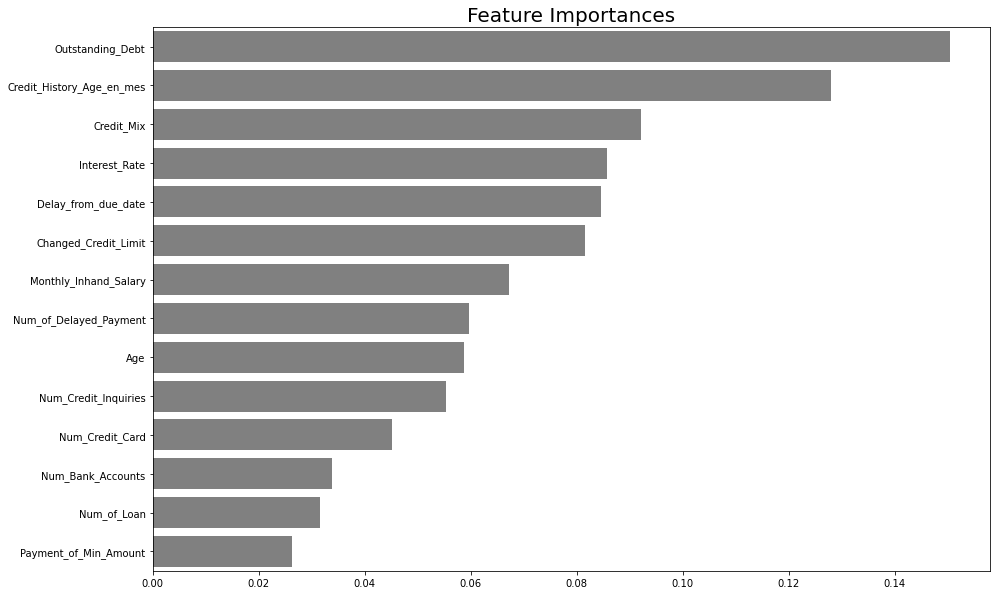

In [82]:
# plot variable importance of random forest
forest_importances = pd.Series(rfc_model.feature_importances_, index=X.columns).sort_values(ascending=False)

# fig, ax = plt.subplots()
fig = plt.figure(figsize=(15,10))
# plot barh
sns.barplot(x=forest_importances.values, y=forest_importances.index,color='grey')

plt.title('Feature Importances', fontsize=20)

plt.show()

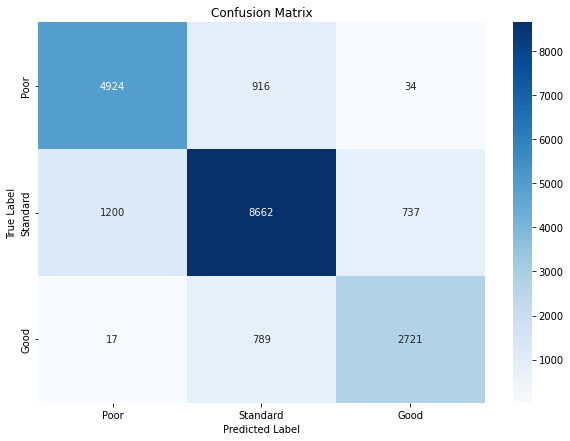

In [83]:
# plot confusion matrix
plt.figure(figsize=(10,7))
sns.heatmap(confusion_matrix(y_test, rfc_model.predict(X_test)), annot=True, fmt='d', cmap='Blues')

plt.title('Confusion Matrix')
plt.ylabel('True Label')
plt.xlabel('Predicted Label')

plt.yticks(ticks = [0.5, 1.5 , 2.5], labels = ['Poor', 'Standard', 'Good'])
plt.xticks(ticks = [0.5, 1.5 , 2.5], labels = ['Poor', 'Standard', 'Good'])


plt.show()

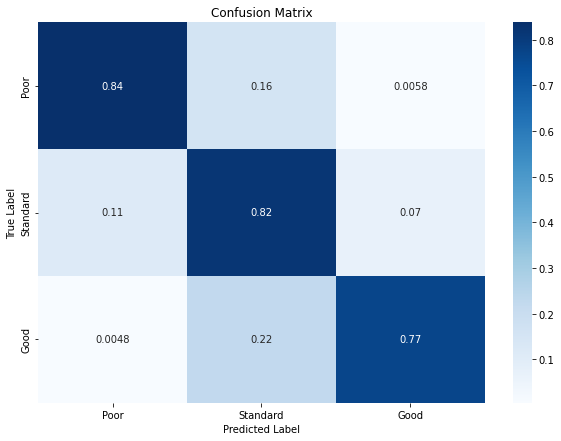

In [194]:
# plot confusion matrix
plt.figure(figsize=(10,7))
sns.heatmap(confusion_matrix(y_test, rfc_model.predict(X_test),normalize="true"), annot=True, cmap='Blues')

plt.title('Confusion Matrix')
plt.ylabel('True Label')
plt.xlabel('Predicted Label')

plt.yticks(ticks = [0.5, 1.5 , 2.5], labels = ['Poor', 'Standard', 'Good'])
plt.xticks(ticks = [0.5, 1.5 , 2.5], labels = ['Poor', 'Standard', 'Good'])
plt.show()

## k-Nearest Neighbor

In [84]:
# Igualmente probamos uno modelo simple de KNN, a ver que resultado puede dar:

knn_basico = KNeighborsClassifier(n_neighbors=5)
knn_basico.fit(X_train_scaled, y_train)

KNeighborsClassifier()

In [85]:

knn_basico_predictions = knn_basico.predict(X_test_scaled)

In [86]:

print(classification_report(y_test,knn_basico_predictions))

              precision    recall  f1-score   support

           0       0.77      0.82      0.79      5874
           1       0.81      0.78      0.80     10599
           2       0.73      0.73      0.73      3527

    accuracy                           0.78     20000
   macro avg       0.77      0.78      0.77     20000
weighted avg       0.79      0.78      0.78     20000



In [62]:
# KNN
grid_neighbors = {"n_neighbors": range(1,30),     
                  "weights": ["uniform","distance"]  
                  }

knn = KNeighborsClassifier()


knn_gs = GridSearchCV(knn, grid_neighbors, cv=5, scoring='accuracy',verbose=2)

knn_gs.fit(X_train_scaled, y_train)

Fitting 5 folds for each of 58 candidates, totalling 290 fits
[CV] END .....................n_neighbors=1, weights=uniform; total time=  14.8s
[CV] END .....................n_neighbors=1, weights=uniform; total time=  13.8s
[CV] END .....................n_neighbors=1, weights=uniform; total time=  14.2s
[CV] END .....................n_neighbors=1, weights=uniform; total time=  14.4s
[CV] END .....................n_neighbors=1, weights=uniform; total time=  14.0s
[CV] END ....................n_neighbors=1, weights=distance; total time=  13.6s
[CV] END ....................n_neighbors=1, weights=distance; total time=  13.7s
[CV] END ....................n_neighbors=1, weights=distance; total time=  13.8s
[CV] END ....................n_neighbors=1, weights=distance; total time=  14.1s
[CV] END ....................n_neighbors=1, weights=distance; total time=  14.2s
[CV] END .....................n_neighbors=2, weights=uniform; total time=  16.8s
[CV] END .....................n_neighbors=2, we

GridSearchCV(cv=5, estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': range(1, 30),
                         'weights': ['uniform', 'distance']},
             scoring='accuracy', verbose=2)

In [63]:
knn_gs_predictions = knn_gs.predict(X_test_scaled)

In [64]:

print(classification_report(y_test,knn_gs_predictions))

              precision    recall  f1-score   support

           0       0.76      0.76      0.76      5874
           1       0.78      0.79      0.78     10599
           2       0.68      0.67      0.67      3527

    accuracy                           0.76     20000
   macro avg       0.74      0.74      0.74     20000
weighted avg       0.76      0.76      0.76     20000



## SVM model

In [87]:
rbf = svm.SVC(kernel='rbf', gamma=0.5, C=0.1, random_state=7).fit(X_train_scaled, y_train)
rbf_pred = rbf.predict(X_test_scaled)
rbf_accuracy = accuracy_score(y_test, rbf_pred)
rbf_f1 = f1_score(y_test, rbf_pred, average='weighted')

In [88]:
print(classification_report(y_test, rbf_pred))

              precision    recall  f1-score   support

           0       0.77      0.61      0.68      5874
           1       0.72      0.81      0.76     10599
           2       0.61      0.60      0.60      3527

    accuracy                           0.71     20000
   macro avg       0.70      0.67      0.68     20000
weighted avg       0.71      0.71      0.71     20000



In [89]:
# Polynomial kernel
poly = svm.SVC(kernel='poly', degree=4, C=1, random_state=7).fit(X_train_scaled, y_train)

poly_pred = poly.predict(X_test_scaled)

poly_accuracy = accuracy_score(y_test, poly_pred)
poly_f1 = f1_score(y_test, poly_pred, average='weighted')

In [90]:
print(classification_report(y_test, poly_pred))

              precision    recall  f1-score   support

           0       0.75      0.55      0.63      5874
           1       0.72      0.77      0.74     10599
           2       0.57      0.69      0.62      3527

    accuracy                           0.69     20000
   macro avg       0.68      0.67      0.67     20000
weighted avg       0.70      0.69      0.69     20000



##  GradientBoosting Classifier

In [54]:
grid_gradient_boosting = {"loss": ["deviance"], 
                          "learning_rate": [0.1, 0.2, 0.4, 0.5],  
                          
                          "n_estimators": [20,50,100,200], 
                                                          
                          
                          "max_depth": [1,2,3,4,5],
                          
                          
                          "max_features": ["sqrt", 3, 4], 
                          }


grandient_boosting = GradientBoostingClassifier()


grandient_boosting_gs = GridSearchCV(grandient_boosting, grid_gradient_boosting, cv=5, scoring='accuracy',verbose=2)

grandient_boosting_gs.fit(X_train_scaled, y_train)

grandient_boosting_gs_predictions = grandient_boosting_gs.predict(X_test_scaled)


Fitting 5 folds for each of 240 candidates, totalling 1200 fits
[CV] END learning_rate=0.1, loss=deviance, max_depth=1, max_features=sqrt, n_estimators=20; total time=   1.9s
[CV] END learning_rate=0.1, loss=deviance, max_depth=1, max_features=sqrt, n_estimators=20; total time=   1.7s
[CV] END learning_rate=0.1, loss=deviance, max_depth=1, max_features=sqrt, n_estimators=20; total time=   1.7s
[CV] END learning_rate=0.1, loss=deviance, max_depth=1, max_features=sqrt, n_estimators=20; total time=   1.7s
[CV] END learning_rate=0.1, loss=deviance, max_depth=1, max_features=sqrt, n_estimators=20; total time=   1.7s
[CV] END learning_rate=0.1, loss=deviance, max_depth=1, max_features=sqrt, n_estimators=50; total time=   4.0s
[CV] END learning_rate=0.1, loss=deviance, max_depth=1, max_features=sqrt, n_estimators=50; total time=   4.0s
[CV] END learning_rate=0.1, loss=deviance, max_depth=1, max_features=sqrt, n_estimators=50; total time=   4.1s
[CV] END learning_rate=0.1, loss=deviance, max_d

In [55]:

print(classification_report(y_test,grandient_boosting_gs_predictions))

              precision    recall  f1-score   support

           0       0.78      0.76      0.77      5874
           1       0.79      0.80      0.80     10599
           2       0.72      0.71      0.72      3527

    accuracy                           0.77     20000
   macro avg       0.76      0.76      0.76     20000
weighted avg       0.77      0.77      0.77     20000



In [56]:
grandient_boosting_gs.best_params_

{'learning_rate': 0.5,
 'loss': 'deviance',
 'max_depth': 5,
 'max_features': 4,
 'n_estimators': 200}

In [94]:
grandient_boosting_model = GradientBoostingClassifier(learning_rate=0.5,
 loss='deviance',
 max_depth= 5,
 max_features= 4,
 n_estimators=200)


grandient_boosting_model.fit(X_train_scaled, y_train)
grandient_boosting_model_predictions = grandient_boosting_model.predict(X_test_scaled)

print(classification_report(y_test,grandient_boosting_model_predictions))


              precision    recall  f1-score   support

           0       0.78      0.78      0.78      5874
           1       0.80      0.81      0.80     10599
           2       0.75      0.73      0.74      3527

    accuracy                           0.79     20000
   macro avg       0.78      0.77      0.77     20000
weighted avg       0.79      0.79      0.79     20000



Por accuracy cabe mecionar que el mejor modelo es el modelo de Random Forest.

In [97]:
# Guardar el modelo
import pickle

with open('my_model.model', "wb") as archivo_salida:
    pickle.dump(rfc_model, archivo_salida)

In [98]:
# Para volver a leer el modelo
with open('my_model.model', "rb") as archivo_entrada:
    modelo_importada = pickle.load(archivo_entrada)
    
print(modelo_importada)

RandomForestClassifier(max_depth=38, max_features=4, max_leaf_nodes=11000,
                       n_estimators=322, oob_score=True, random_state=7)


In [99]:
import pickle

with open('model_dt_gs.model', "wb") as archivo_salida:
    pickle.dump(dt_gs, archivo_salida)

In [100]:
import pickle

with open('model_knn_basico.model', "wb") as archivo_salida:
    pickle.dump(knn_basico, archivo_salida)

In [101]:
import pickle

with open('model_rbf.model', "wb") as archivo_salida:
    pickle.dump(rbf, archivo_salida)

In [102]:
import pickle

with open('model_grandient_boosting_model.model', "wb") as archivo_salida:
    pickle.dump(grandient_boosting_model, archivo_salida)